# Practical Application III: Comparing Classifiers

**Overview**: In this practical application, your goal is to compare the performance of the classifiers we encountered in this section, namely K Nearest Neighbor, Logistic Regression, Decision Trees, and Support Vector Machines.  We will utilize a dataset related to marketing bank products over the telephone.  



### Getting Started

Our dataset comes from the UCI Machine Learning repository [link](https://archive.ics.uci.edu/ml/datasets/bank+marketing).  The data is from a Portugese banking institution and is a collection of the results of multiple marketing campaigns.  We will make use of the article accompanying the dataset [here](CRISP-DM-BANK.pdf) for more information on the data and features.



### Problem 1: Understanding the Data

To gain a better understanding of the data, please read the information provided in the UCI link above, and examine the **Materials and Methods** section of the paper.  How many marketing campaigns does this data represent?

17 campaigns that happened between May 2008 and November 2010

In [1]:
from google.colab import drive
drive.mount('/content/drive')
import os
os.chdir('/content/drive/My Drive/Berkeley/Unit17/practical_application_III')

Mounted at /content/drive


### Problem 2: Read in the Data

Use pandas to read in the dataset `bank-additional-full.csv` and assign to a meaningful variable name.

In [2]:
import pandas as pd

In [3]:
# df = pd.read_csv('data/bank-additional/bank-additional-full.csv', sep = ';')
MktgCampaigns = pd.read_csv('data/bank-additional-full.csv', sep =";" )

In [4]:
MktgCampaigns.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


### Problem 3: Understanding the Features


Examine the data description below, and determine if any of the features are missing values or need to be coerced to a different data type.


```
Input variables:
# bank client data:
1 - age (numeric)
2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
5 - default: has credit in default? (categorical: 'no','yes','unknown')
6 - housing: has housing loan? (categorical: 'no','yes','unknown')
7 - loan: has personal loan? (categorical: 'no','yes','unknown')
# related with the last contact of the current campaign:
8 - contact: contact communication type (categorical: 'cellular','telephone')
9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
# other attributes:
12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
14 - previous: number of contacts performed before this campaign and for this client (numeric)
15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
# social and economic context attributes
16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)
17 - cons.price.idx: consumer price index - monthly indicator (numeric)
18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)
19 - euribor3m: euribor 3 month rate - daily indicator (numeric)
20 - nr.employed: number of employees - quarterly indicator (numeric)

Output variable (desired target):
21 - y - has the client subscribed a term deposit? (binary: 'yes','no')
```



In [5]:
MktgCampaigns.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

There no features with missing values or need to be coerced to a different data type.

In [6]:
MktgCampaigns.isnull().sum()

,0
age,0
job,0
marital,0
education,0
default,0
housing,0
loan,0
contact,0
month,0
day_of_week,0


In [7]:
# Checking if there are unknown to remove them
MktgCampaigns = pd.read_csv('data/bank-additional-full.csv', sep=';')

# Identify columns with 'unknown' values
columns_with_unknown = MktgCampaigns.columns[MktgCampaigns.isin(['unknown']).any()]

# Remove rows with 'unknown' values in any of the identified columns
MktgCampaigns_cleaned = MktgCampaigns[~MktgCampaigns[columns_with_unknown].isin(['unknown']).any(axis=1)]

# Display the shape of the original and cleaned datasets
print(f"Original dataset shape: {MktgCampaigns.shape}")
print(f"Cleaned dataset shape: {MktgCampaigns_cleaned.shape}")
# I suggest to remove the unknown

Original dataset shape: (41188, 21)
Cleaned dataset shape: (30488, 21)


In [8]:
MktgCampaigns = MktgCampaigns_cleaned
# now on, we use a light data set
print(f"Original dataset shape: {MktgCampaigns.shape}")

Original dataset shape: (30488, 21)


In [9]:
MktgCampaigns.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
6,59,admin.,married,professional.course,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


# Finding relations between numeric variables related to the target

**Using sns pairplot**

 I used sns pairplot to get a grid of plots to visualize the relationships between 'duration', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', and 'y'.

 The diagonal plots show the distribution of each of these variables, while the off-diagonal plots show scatter plots of the variables against each other.

 The points are colored based on the 'y' value, allowing you to explore how the relationships might vary between different target variable groups.


Original dataset shape: (41188, 21)
Cleaned dataset shape: (30488, 21)


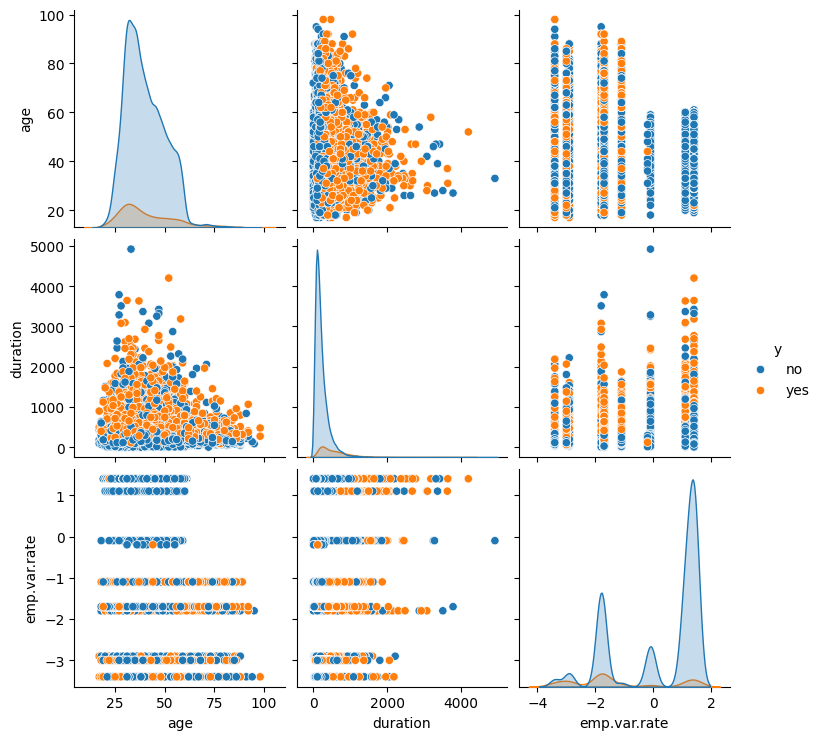

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

# Checking if there are unknown to remove them
MktgCampaigns = pd.read_csv('data/bank-additional-full.csv', sep=';')

# Identify columns with 'unknown' values
columns_with_unknown = MktgCampaigns.columns[MktgCampaigns.isin(['unknown']).any()]

# Remove rows with 'unknown' values in any of the identified columns
MktgCampaigns_cleaned = MktgCampaigns[~MktgCampaigns[columns_with_unknown].isin(['unknown']).any(axis=1)]

# Display the shape of the original and cleaned datasets
print(f"Original dataset shape: {MktgCampaigns.shape}")
print(f"Cleaned dataset shape: {MktgCampaigns_cleaned.shape}")
# I suggest to remove the unknown

numeric_features = ['age','duration','emp.var.rate'
]
sns.pairplot(MktgCampaigns[['y']+numeric_features], hue='y')
plt.show()

**Using Correlation Matrix with heatmap**




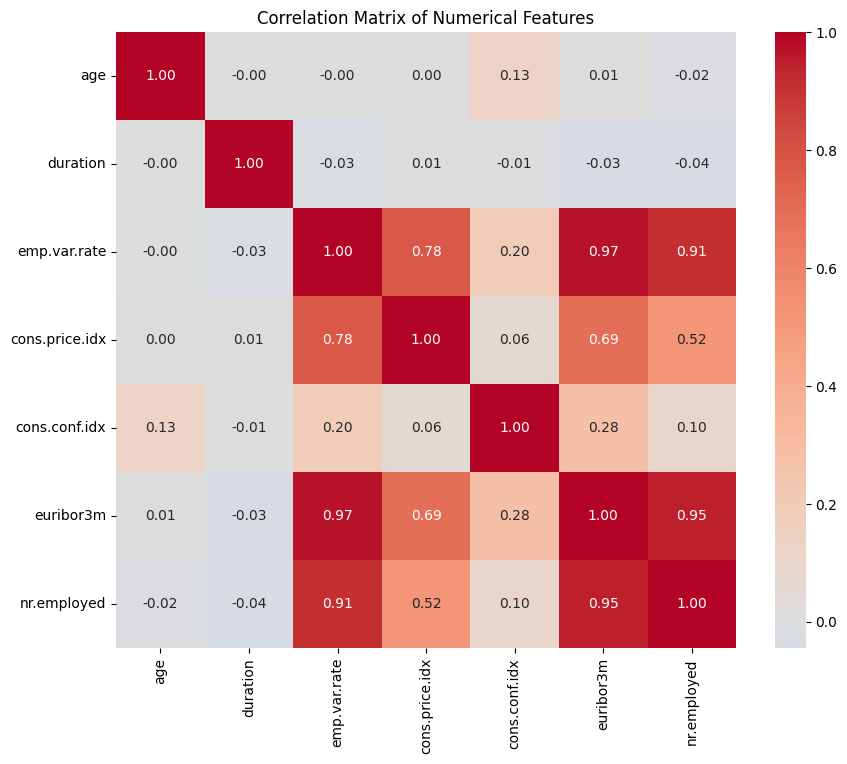

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
numeric_features = ['age','duration','emp.var.rate',
                    'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed'
]

# Step 1: Select data
numerical_data = MktgCampaigns[numeric_features]
# Step 2: take the numerical and do the correlation
correlation_matrix = MktgCampaigns[numeric_features].corr()

# Step 3: Plot a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', center=0)
plt.title('Correlation Matrix of Numerical Features')
plt.show()


In the correlation matrix/heatmap I can see redundant features such as: euribor3m with emp.var.rate and ne.emploes with euribor3m  and emp.var.rate. I would say most of them are redundant, I could use one of them if I want to analyze correlation with y
next step is to include y in the analysis


In [12]:
# Checking if there are unknown to remove them
MktgCampaigns = pd.read_csv('data/bank-additional-full.csv', sep=';')

# Identify columns with 'unknown' values
columns_with_unknown = MktgCampaigns.columns[MktgCampaigns.isin(['unknown']).any()]

# Remove rows with 'unknown' values in any of the identified columns
MktgCampaigns_cleaned = MktgCampaigns[~MktgCampaigns[columns_with_unknown].isin(['unknown']).any(axis=1)]

# Display the shape of the original and cleaned datasets
print(f"Original dataset shape: {MktgCampaigns.shape}")
print(f"Cleaned dataset shape: {MktgCampaigns_cleaned.shape}")
# I suggest to remove the unknown


Original dataset shape: (41188, 21)
Cleaned dataset shape: (30488, 21)


In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

MktgCampaigns['y'] = MktgCampaigns['y'].map({'yes': 1, 'no': 0})
MktgCampaigns.head()


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0


In [14]:
# Now recompute the correlation matrix
numerical_data = MktgCampaigns.select_dtypes(include='number')
correlation_matrix = numerical_data.corr()

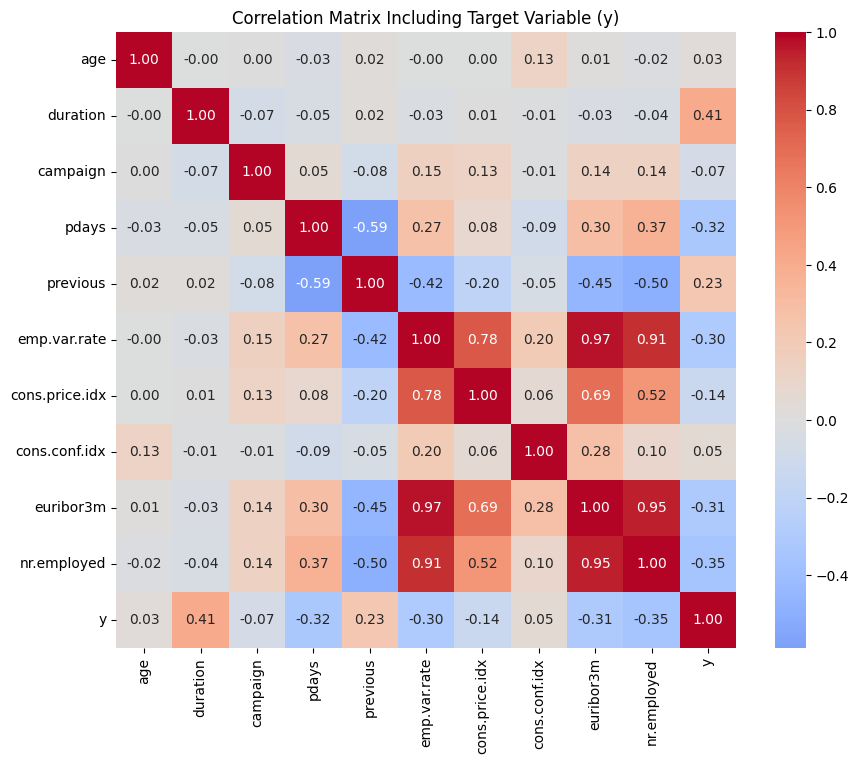

In [15]:
# Plot the heatmap again
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', center=0)
plt.title('Correlation Matrix Including Target Variable (y)')
plt.show()

Clearly the only feature highly correlated with y is duration


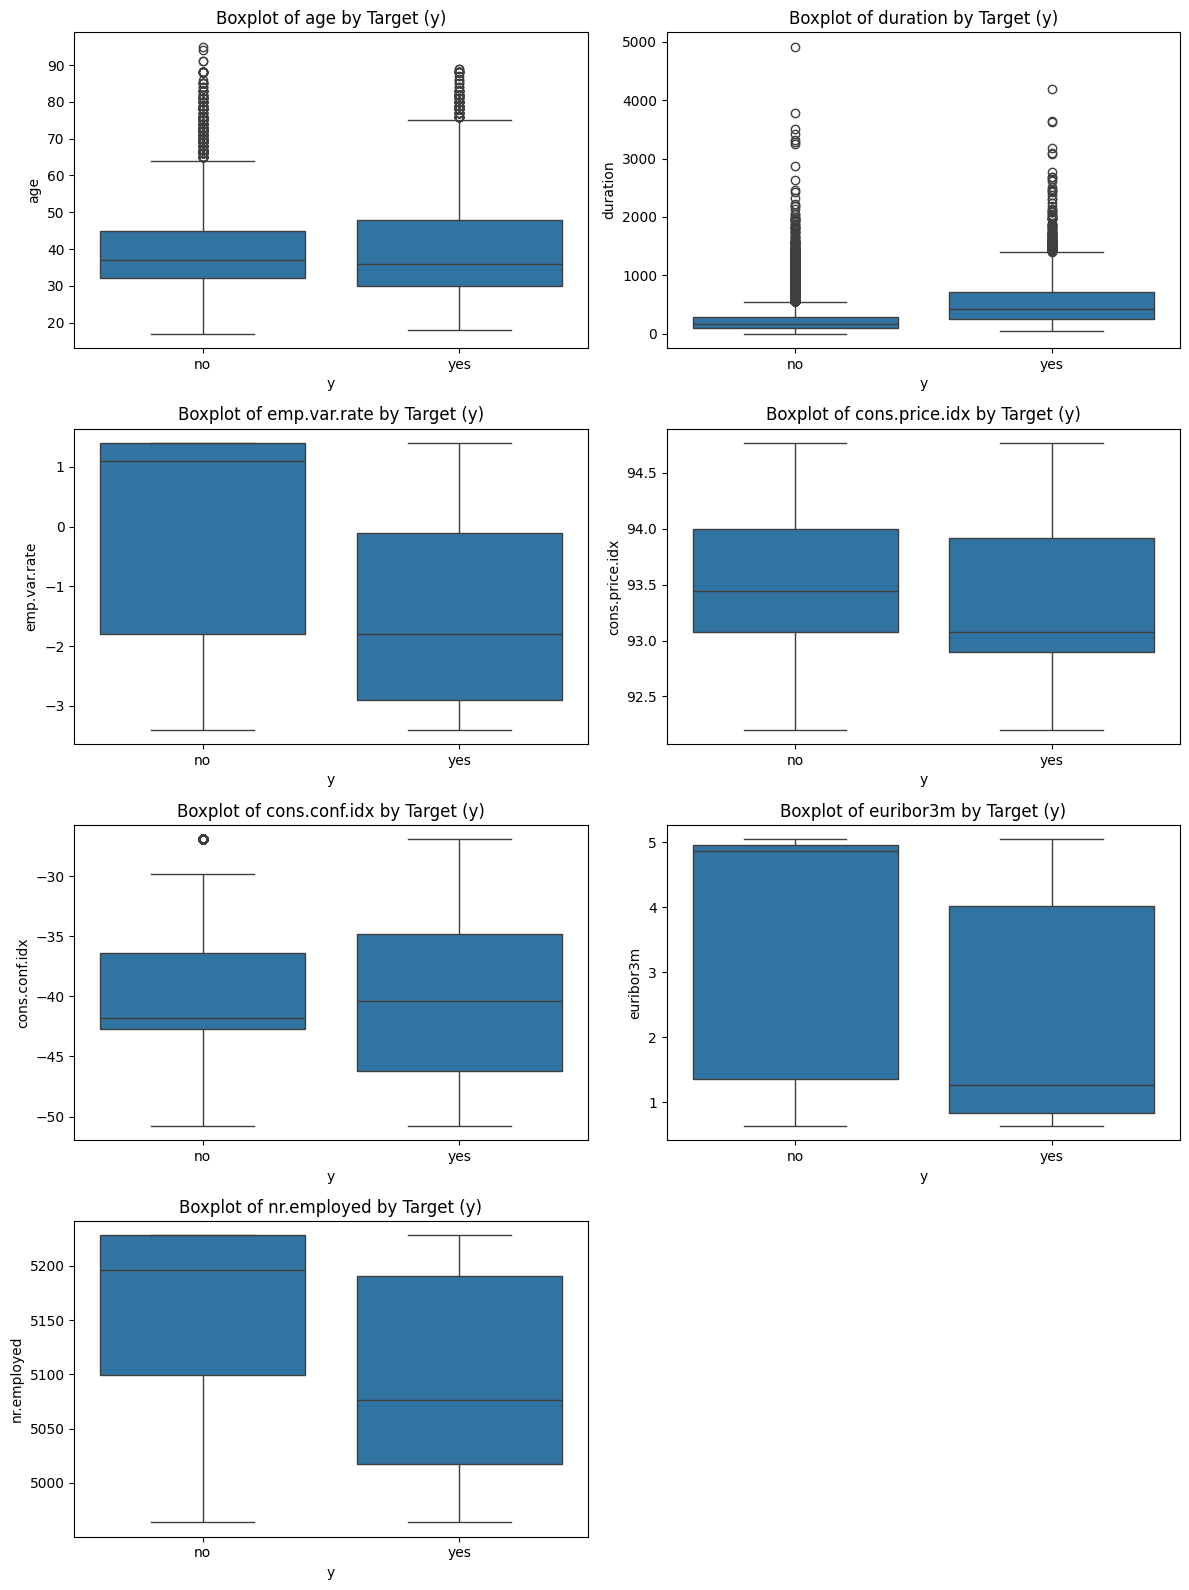

In [16]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# List of numeric features to plot
numeric_features = ['age', 'duration', 'emp.var.rate',
                    'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed'
]

# Determine subplot grid dimensions (2 columns)
ncols = 2
nrows = (len(numeric_features) + 1) // ncols

plt.figure(figsize=(ncols * 6, nrows * 4))

# Create box plots: target variable 'y' is set on the x-axis and each numeric feature on the y-axis
for idx, feature in enumerate(numeric_features):
    plt.subplot(nrows, ncols, idx + 1)
    sns.boxplot(x='y', y=feature, data=MktgCampaigns_cleaned)
    plt.title(f'Boxplot of {feature} by Target (y)')
    plt.xlabel('y')
    plt.ylabel(feature)

plt.tight_layout()
plt.show()




Duration has the biggest influece in target variable among all the others
Other environment variable features like euribor3m, emp.var.rate, and nr.employed have some influece between “yes” and “no,” but those differences are often minor. Unfortunately duration is not a feature we can pick since is taken after the campaign not before.

### Problem 4: Understanding the Task

After examining the description and data, your goal now is to clearly state the *Business Objective* of the task.  State the objective below.

The business objective is to find a an Inference model that can explain what are the main variables affecting the success of a contact in the business of bank direct marketing campaigns for deposit subscription in Portugal. In this way, we can help to design more efficient marketing campaings, tailoring to specific customer segments, and train the call center in how to handle the calls, questions, day of the week, month, hours, etc. Additionally, once the model has been trained enough it can be used for make predictions of the success of new campaigns helping the process to design new campaigns or it can be used to probe some theories using AB Testing.



### Problem 5: Engineering Features

Now that you understand your business objective, we will build a basic model to get started.  Before we can do this, we must work to encode the data.  Using just the bank information features, prepare the features and target column for modeling with appropriate encoding and transformations.

In [17]:
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
#select the features and target column
# Divided in 3 large meta categories
features_bank_stdScaler = MktgCampaigns[['age']]
features_bank_oneHot = MktgCampaigns[['job','marital','default','housing','loan']]
features_bank_labelEncoder = MktgCampaigns[['education']]
features_nobank = MktgCampaigns[['contact','month','day_of_week','duration','campaign','pdays','previous','poutcome']]
features_external= MktgCampaigns[['emp.var.rate','cons.price.idx','cons.conf.idx','euribor3m','nr.employed']]
target =   MktgCampaigns['y']
# Create a copy to keep the original
# data = MktgCampaigns[[target]+ features].copy()  doesn't work, mixing a series with DF
data = pd.concat([target, features_bank_stdScaler,features_bank_oneHot,features_bank_labelEncoder,features_nobank,features_external], axis=1)
data.head()

,y,age,job,marital,default,housing,loan,education,contact,month,...,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,0,56,housemaid,married,no,no,no,basic.4y,telephone,may,...,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0
1,0,57,services,married,unknown,no,no,high.school,telephone,may,...,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0
2,0,37,services,married,no,yes,no,high.school,telephone,may,...,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0
3,0,40,admin.,married,no,no,no,basic.6y,telephone,may,...,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0
4,0,56,services,married,no,no,yes,high.school,telephone,may,...,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0


In [18]:
# 1) Apply StandardScaler() to features_bank_stdScaler
scaler = StandardScaler()
scaled_age = scaler.fit_transform(features_bank_stdScaler)
scaled_age_df = pd.DataFrame(scaled_age, columns=['age_scaled'], index=features_bank_stdScaler.index)

# 2) Apply OneHotEncoder() to features_bank_oneHot
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')  # sparse=False for DataFrame output
encoded_features = encoder.fit_transform(features_bank_oneHot)
encoded_feature_names = encoder.get_feature_names_out(features_bank_oneHot.columns)
encoded_features_df = pd.DataFrame(encoded_features, columns=encoded_feature_names, index=features_bank_oneHot.index)

# 3) Apply LabelEncoder() to features_bank_labelEncoder
label_encoder = LabelEncoder()
encoded_education = label_encoder.fit_transform(features_bank_labelEncoder['education']) # Assuming 'education' is the column
encoded_education_df = pd.DataFrame(encoded_education, columns=['education_encoded'], index=features_bank_labelEncoder.index)

# Combine transformed features with other features and target
# final_data_full_data = pd.concat([target, scaled_age_df, encoded_features_df, encoded_education_df, features_nobank, features_external], axis=1)
final_data_only_bank = pd.concat([target, scaled_age_df, encoded_features_df, encoded_education_df], axis=1)

For Categorical Features one hot encoded, label encoded. Does not make sense because they become in discrete variables. One-hot-encoding makes 1/0 for each column-category => Not real distribution. Label encoding, still represent categories rather than genuine numeric magnitudes.=> no meaningful information from a box plot. However education can suggest some degree of distribution to get insight from here:

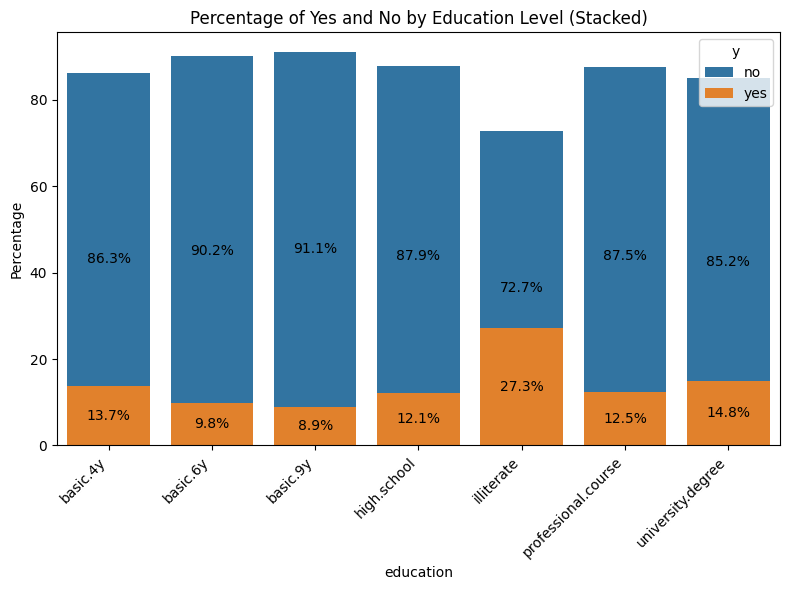

In [19]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Calculate percentages (same as before)
education_percentages = MktgCampaigns_cleaned.groupby('education')['y'].value_counts(normalize=True).mul(100).rename('percentage').reset_index()

# Create the stacked bar plot
plt.figure(figsize=(8, 6))
ax = sns.barplot(x='education', y='percentage', hue='y', data=education_percentages, dodge=False)  # dodge=False for stacking

# Add percentage text labels within bars
for container in ax.containers:
    # Get current segment height (percentage value)
    heights = [v.get_height() for v in container]

    # Calculate label position (middle of the segment)
    positions = [v.get_x() + v.get_width() / 2 for v in container]

    # Add text labels with percentage values
    ax.bar_label(container, labels=[f'{h:.1f}%' if h > 0 else '' for h in heights], label_type='center')

plt.xticks(rotation=45, ha='right')
plt.ylabel('Percentage')
plt.title('Percentage of Yes and No by Education Level (Stacked)')
plt.tight_layout()
plt.show()

We can see the group with higher chance to say yes is the iliterate. but followed by university degree. That suggest that the both extreme are the best target group for some socio-economical reasons

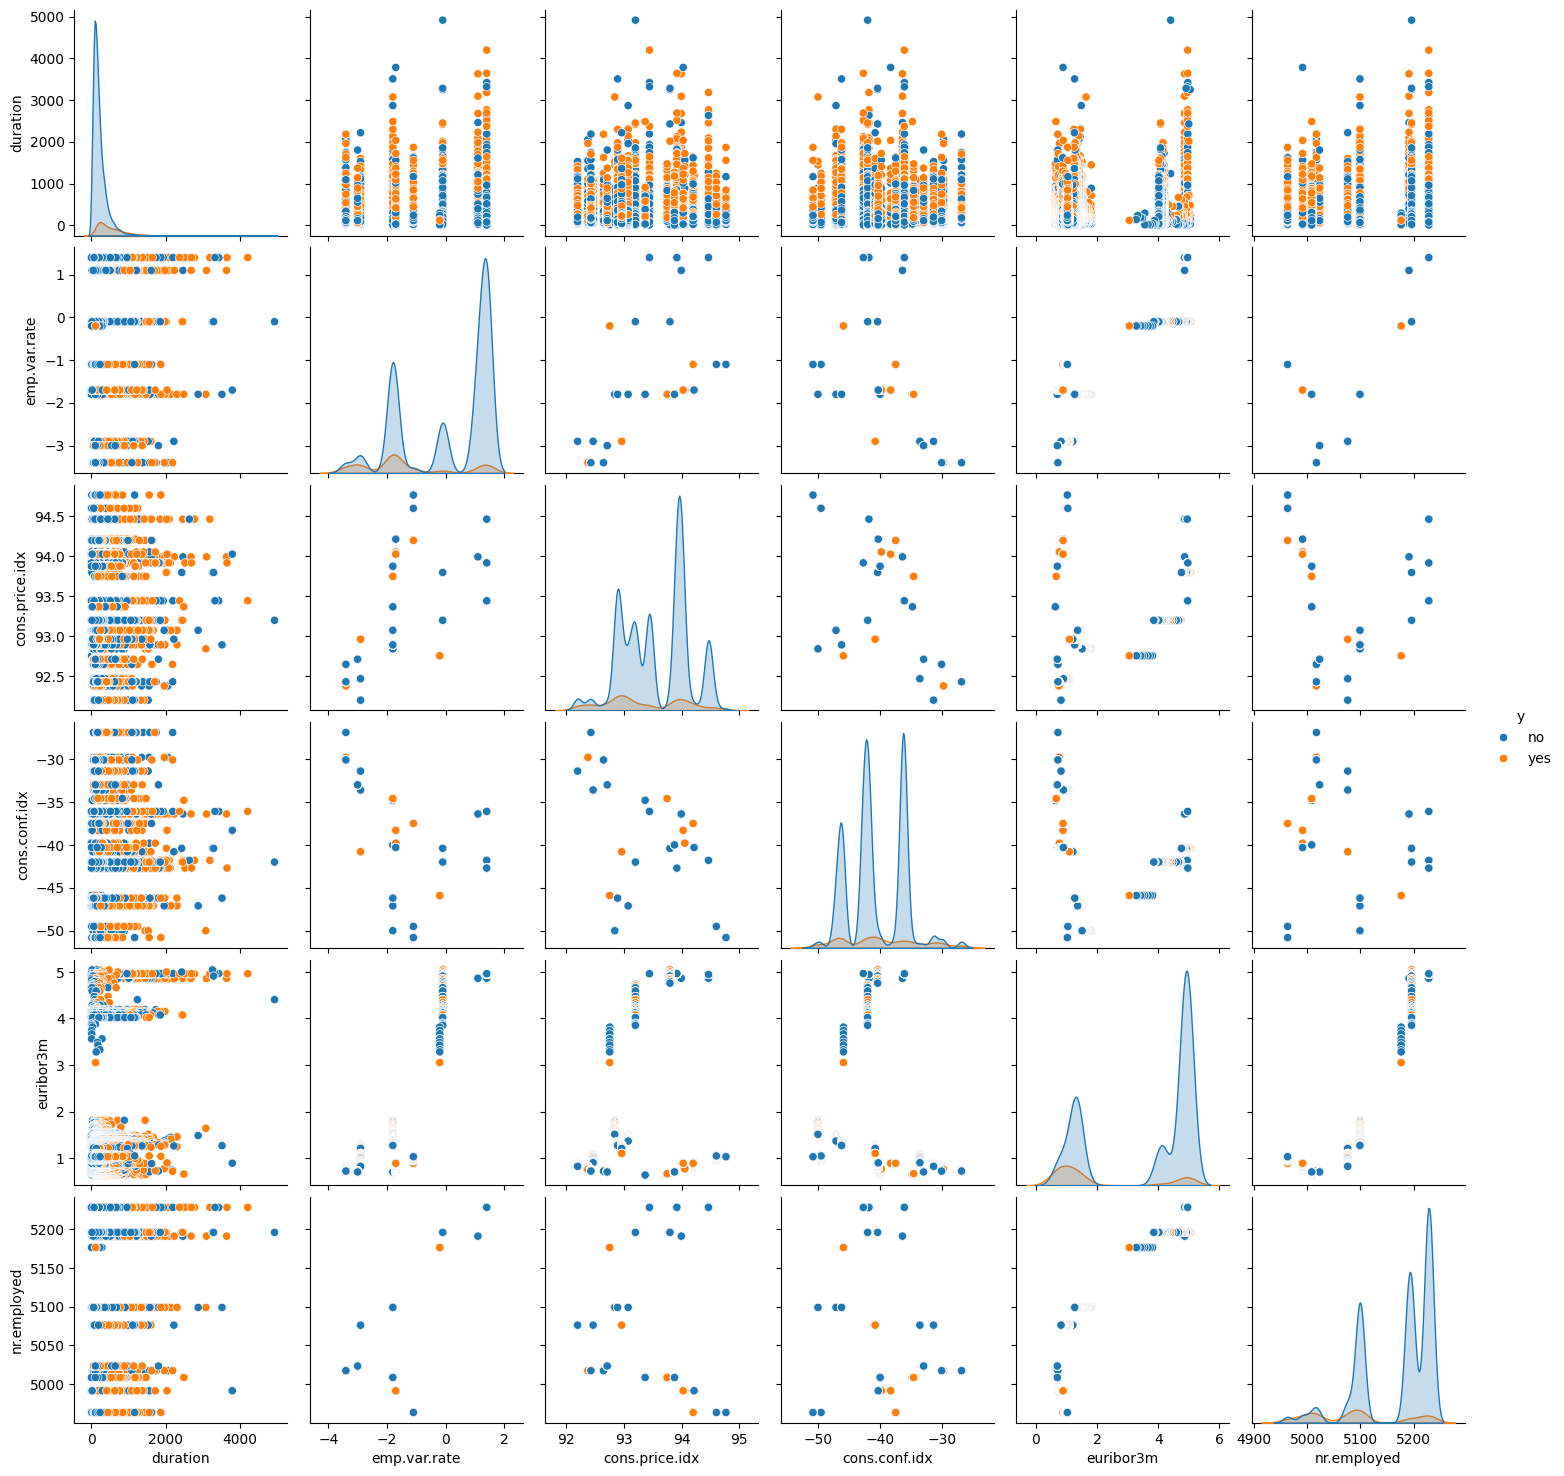

In [20]:
numeric_features = ['duration', 'emp.var.rate',
                    'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed'
]
sns.pairplot(MktgCampaigns_cleaned[['y'] + numeric_features], hue='y')
plt.show()

Text(0, 0.5, 'Age')

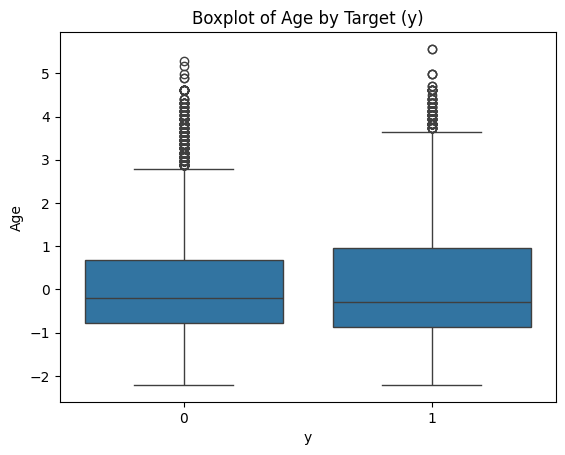

In [21]:
sns.boxplot(x='y', y='age_scaled', data=final_data_only_bank)
plt.title('Boxplot of Age by Target (y)')
plt.xlabel('y')
plt.ylabel('Age')


Age is not a predictor.

This step is very relevant for me as a learner: Because the objetive of this practical application is to compare the performance of the classifiers we encountered in this section, namely K Nearest Neighbor, Logistic Regression, Decision Trees, and Support Vector Machines. I have to think in what other transformations are needed to make the data suitable for those classifiers.

# Analysis of Potential Transformations

1.   **Scaling Numerical Tranformations**

**Why:** KNN and SVM are sensitive to the scale of features, as they rely on distance calculations. Features with larger ranges can dominate the distance calculations, leading to biased results. Logistic Regression and Decision Trees can also benefit from scaling in some cases.

**Methods:**

*   `StandardScaler:` Scales features to have zero mean and unit variance. is usual.
*   `MinMaxScaler:` Scales features to a given range (e.g., 0 to 1). Useful when you want to preserve the original
* `RobustScaler:` Less sensitive to outliers than StandardScaler.

**Application:** Apply scaling to numerical features like 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', and 'nr.employed'.


2.   One-hot Encoding for Categorical Features

**Why:** Label encoding assigns numerical values to categories, which can sometimes imply an order that doesn't exist (e.g., 'job' categories). One-hot encoding creates binary features for each category, avoiding this issue.

**Methods:**
*   pd.get_dummies(): Simple way to create one-hot encoded features in Pandas.
*   OneHotEncoder (from scikit-learn): More flexible and allows handling of unseen categories during testing.

**Application:** Apply one-hot encoding to categorical features like 'job', 'marital', 'education', 'default', 'housing', 'loan', 'month', 'day_of_week', and 'poutcome'.


# Feature Interactions:

Creating new features by combining existing ones might capture relationships that individual features don't.

**Methods:**

* Polynomial Features (from scikit-learn): Creates polynomial combinations of features.
* Domain-specific interactions: Manually create features based on your understanding of the data.


### Problem 6: Train/Test Split

With your data prepared, split it into a train and test set.

In [22]:
from sklearn.model_selection import train_test_split

# Split the data into train and test sets
X = final_data_only_bank.drop('y', axis=1)  # Features (drop the target column)
y = final_data_only_bank['y']             # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# test_size=0.2 means 20% for testing, 80% for training
# random_state=42 ensures reproducibility

### Problem 7: A Baseline Model

Before we build our first model, we want to establish a baseline.  What is the baseline performance that our classifier should aim to beat?

In [26]:
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score, precision_score,recall_score, f1_score, confusion_matrix

# Create a DummyClassifier (most_frequent strategy)
dummy_classifier = DummyClassifier(strategy="most_frequent")

# Fit the DummyClassifier on the training data
dummy_classifier.fit(X_train, y_train)

# Predict on the test data
y_pred_baseline = dummy_classifier.predict(X_test)

# Calculate baseline accuracy
baseline_accuracy = accuracy_score(y_test, y_pred_baseline)
# Convert y_test and y_pred_baseline to numerical labels (0 and 1)
y_test_numeric = y_test.map({'yes': 1, 'no': 0}).fillna(0).astype(int)  # Map 'yes' to 1 and 'no' to 0
y_pred_baseline_numeric = pd.Series(y_pred_baseline).map({'yes': 1, 'no': 0}).fillna(0).astype(int)
recall = recall_score(y_test_numeric, y_pred_baseline_numeric, pos_label=1) # Use pos_label=1 for 'yes'
precision = precision_score(y_test_numeric, y_pred_baseline_numeric, pos_label=1) # Use pos_label=1 for 'yes'
f1 = f1_score(y_test_numeric, y_pred_baseline_numeric, pos_label=1) # Use pos_label=1 for 'yes'
# recall = recall_score(y_test, y_pred_baseline, pos_label='yes')
# precision = precision_score(y_test, y_pred_baseline, pos_label='yes')
# f1 = f1_score(y_test, y_pred_baseline, pos_label='yes')
print(f"Baseline Accuracy: {baseline_accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-Score: {f1}")

Baseline Accuracy: 0.8865015780529255
Precision: 0.0
Recall: 0.0
F1-Score: 0.0


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


The high accuracy is misleading in this case because it's driven by the imbalanced dataset. The dummy classifier essentially ignores the minority class ('yes'), resulting in poor precision, recall, and F1-score.

* **Precision:** Since there are no (or very few) predicted positive cases, the precision becomes 0 (or very close to 0).
* **Recall:** Similarly, as the model doesn't identify any true positives, the recall is also 0.
* **F1-score:** Being the harmonic mean of precision and recall, the F1-score is also 0.

In [27]:
# I want to confirm this 0.0
print("Unique predictions:", y_pred_baseline_numeric.unique())
print("Target distribution in test set:\n", y_test_numeric.value_counts())

Unique predictions: [0]
Target distribution in test set:
 y
0    8238
Name: count, dtype: int64


This results confirm that my DummyClassifier predicted only class 0,  is 'no' for every sample in the the test set.  Actually, in the test set there are only class zero samples

### Problem 8: A Simple Model

Use Logistic Regression to build a basic model on your data.  

In [28]:
from sklearn.linear_model import LogisticRegression
logistic_regression_model = LogisticRegression(max_iter=1000)
logistic_regression_model.fit(X_train, y_train)
y_pred_logistic_regression = logistic_regression_model.predict(X_test)


### Problem 9: Score the Model

What is the accuracy of your model?

In [30]:
accuracy_lr = accuracy_score(y_test, y_pred_logistic_regression)
precision_lr = precision_score(y_test, y_pred_logistic_regression, pos_label=1)
recall_lr = recall_score(y_test, y_pred_logistic_regression, pos_label=1)
f1_lr = f1_score(y_test, y_pred_logistic_regression, pos_label=1)
print(f"Logistic Regression Accuracy: {accuracy_lr}")
print(f"Logistic Regression Precision: {precision_lr}")
print(f"Logistic Regression Recall: {recall_lr}")
print(f"Logistic Regression F1-Score: {f1_lr}")


Logistic Regression Accuracy: 0.8865015780529255
Logistic Regression Precision: 0.0
Logistic Regression Recall: 0.0
Logistic Regression F1-Score: 0.0


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Baseline (Dummy Classifier):
* Accuracy :0.8697933748770088
* Precision: 0.0
* Recall : 0.0
* F1 : 0.0

Logistic Regression:
* Accuracy: 0.8697933748770088
* Precision: 0.0
* Recall: 0.0
* F1-Score: 0.0

**Explanation of Differences:**
* Accuracy: Both the Dummy Classifier and Logistic Regression have the same accuracy. This indicates that the Logistic Regression model is not improving the prediction accuracy over the baseline model. This could be due to the nature of the data or the features used in the model.

* Precision, Recall, and F1-Score: Both models have precision, recall, and F1-score of 0.0. This suggests that neither model is correctly predicting the positive class ('yes').

The warning messages indicate that precision is ill-defined due to no predicted samples for the positive class. This could be due to class imbalance in the dataset or the model not being able to capture the patterns for the positive class.

I'm curious : what if I change the Logistic regression class_weight parameter set to balanced instead of the default ?


In [31]:
from sklearn.linear_model import LogisticRegression
logistic_regression_model = LogisticRegression(class_weight='balanced', max_iter=1000)
logistic_regression_model.fit(X_train, y_train)
y_pred_logistic_regression = logistic_regression_model.predict(X_test)


In [35]:
accuracy_lr = accuracy_score(y_test, y_pred_logistic_regression)
precision_lr = precision_score(y_test, y_pred_logistic_regression, pos_label=1)
recall_lr = recall_score(y_test, y_pred_logistic_regression, pos_label=1)
f1_lr = f1_score(y_test, y_pred_logistic_regression, pos_label=1)
print(f"Logistic Regression class_weight=balanced Accuracy: {accuracy_lr}")
print(f"Logistic Regression class_weight=balanced Precision: {precision_lr}")
print(f"Logistic Regression class_weight=balanced Recall: {recall_lr}")
print(f"Logistic Regression class_weight=balanced F1-Score: {f1_lr}")

Logistic Regression class_weight=balanced Accuracy: 0.5849720806020879
Logistic Regression class_weight=balanced Precision: 0.16231647634584012
Logistic Regression class_weight=balanced Recall: 0.6385026737967915
Logistic Regression class_weight=balanced F1-Score: 0.2588337307608931


* Accuracy fell to 0.58 means the prediction of 'no' started failing

* Precision increased to 16.23% indicating some 'yes' samples, but still many false positive. The proportion of True positive increase but not enough to offset the fall of accuracy, but is better than 0 Precision.  

* Recall increased from zero to 50.3% that is good signal since the model is predicting a better ( not enough ) True Positives (yes) proportion among all positives.  

* F1 increased a little, reflecting harmonic mean of precision and recall

after this results, I don't believe Logistic Regression is a good option to model this data set, yet. Unless


### Problem 10: Model Comparisons

Now, we aim to compare the performance of the Logistic Regression model to our KNN algorithm, Decision Tree, and SVM models.  Using the default settings for each of the models, fit and score each.  Also, be sure to compare the fit time of each of the models.  Present your findings in a `DataFrame` similar to that below:

| Model | Train Time | Train Accuracy | Test Accuracy |
| ----- | ---------- | -------------  | -----------   |
|     |    |.     |.     |

In [36]:
# Model Comparisons using only bank provided information before to start the campaign and not including external indicators
# I applied same transformations before, change the database name to MktgCampaigns
# if you want to run the only from here please make sure you have a folder names data under the folder where this code is located
# in that folder please make sure you have the bank-additional-full.csv
# if you are running in a Windows machine use
# path_to_file = r'C:\yoir personal path\data\bank-additional-full.csv'
# MktgCampaigns = pd.read_csv(path_to_file, sep =';')

import pandas as pd
import time
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Load the dataset
MktgCampaigns = pd.read_csv('data/bank-additional-full.csv', sep=';')
# Identify columns with 'unknown' values
columns_with_unknown = MktgCampaigns.columns[MktgCampaigns.isin(['unknown']).any()]
# Remove rows with 'unknown' values in any of the identified columns
MktgCampaigns_cleaned = MktgCampaigns[~MktgCampaigns[columns_with_unknown].isin(['unknown']).any(axis=1)]
MktgCampaigns = MktgCampaigns_cleaned

# Select the features and target column
features_bank_stdScaler = MktgCampaigns[['age']]
features_bank_oneHot = MktgCampaigns[['job', 'marital', 'default', 'housing', 'loan']]
features_bank_labelEncoder = MktgCampaigns[['education']]
features_nobank = MktgCampaigns[['contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays', 'previous', 'poutcome']]
features_external = MktgCampaigns[['emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']]
target = MktgCampaigns['y']

# Apply StandardScaler to features_bank_stdScaler
scaler = StandardScaler()
scaled_age = scaler.fit_transform(features_bank_stdScaler)
scaled_age_df = pd.DataFrame(scaled_age, columns=['age_scaled'], index=features_bank_stdScaler.index)

# Apply OneHotEncoder to features_bank_oneHot
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
encoded_features = encoder.fit_transform(features_bank_oneHot)
encoded_feature_names = encoder.get_feature_names_out(features_bank_oneHot.columns)
encoded_features_df = pd.DataFrame(encoded_features, columns=encoded_feature_names, index=features_bank_oneHot.index)

# Apply LabelEncoder to features_bank_labelEncoder
label_encoder = LabelEncoder()
encoded_education = label_encoder.fit_transform(features_bank_labelEncoder['education'])
encoded_education_df = pd.DataFrame(encoded_education, columns=['education_encoded'], index=features_bank_labelEncoder.index)

# Combine transformed features with other features and target
final_data_only_bank = pd.concat([target, scaled_age_df, encoded_features_df, encoded_education_df], axis=1)

# Split the data into train and test sets
X = final_data_only_bank.drop('y', axis=1)
y = final_data_only_bank['y']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize models
models = {
    "Logistic Regression": LogisticRegression(class_weight='balanced', max_iter=1000),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "Support Vector Machine": SVC(class_weight='balanced')
}

# Future DataFrame to store results, starting with a list to use results.append() Since append method was removed
# in Pandas version 2.0 and above
results_only_bank = []
# Fit and score each model
for model_name, model in models.items():
    start_time = time.time()
    model.fit(X_train, y_train)
    end_time = time.time()

    train_time = end_time - start_time
    train_accuracy = accuracy_score(y_train, model.predict(X_train))
    test_accuracy = accuracy_score(y_test, model.predict(X_test))

    results_only_bank.append({
        "Model": model_name,
        "Train Time": train_time,
        "Train Accuracy": train_accuracy,
        "Test Accuracy": test_accuracy
    })

results_only_bank_df = pd.DataFrame(results_only_bank)
print(results_only_bank_df)



                    Model  Train Time  Train Accuracy  Test Accuracy
0     Logistic Regression    0.325897        0.613448       0.600525
1     K-Nearest Neighbors    0.062279        0.874006       0.859954
2           Decision Tree    0.092511        0.901681       0.852247
3  Support Vector Machine   42.735858        0.632431       0.622499


# Future improvements

**Adding the Economic environment Indicators**

features_external = MktgCampaigns[['emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']].  

**Benchmarking, use as Inference tool**

For Benchmarking I'll include all the features only available AFTER the campaign, not for prediction like Duration: last contact duration, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input and all others

### Problem 11: Improving the Model

Now that we have some basic models on the board, we want to try to improve these.  Below, we list a few things to explore in this pursuit.

- More feature engineering and exploration.  For example, should we keep the gender feature?  Why or why not?
- Hyperparameter tuning and grid search.  All of our models have additional hyperparameters to tune and explore.  For example the number of neighbors in KNN or the maximum depth of a Decision Tree.  
- Adjust your performance metric

In [37]:
# To optimize
# Checking if we have strong, weak or zero correlation to include or exclude features
# code to detect un correlated features
import pandas as pd
import time
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Load the dataset
MktgCampaigns = pd.read_csv('data/bank-additional-full.csv', sep=';')
# Identify columns with 'unknown' values
columns_with_unknown = MktgCampaigns.columns[MktgCampaigns.isin(['unknown']).any()]
# Remove rows with 'unknown' values in any of the identified columns
MktgCampaigns_cleaned = MktgCampaigns[~MktgCampaigns[columns_with_unknown].isin(['unknown']).any(axis=1)]
MktgCampaigns = MktgCampaigns_cleaned

# Select only bank-related columns and the target
X = MktgCampaigns[['age', 'job', 'marital', 'default', 'housing', 'loan', 'education']]
y = MktgCampaigns['y']

# Define which columns are numeric and which are categorical
numeric_features = ["age"]
categorical_features = ["job", "marital", "default", "housing", "loan", "education"]

# Create a preprocessor: scale numeric features and one-hot encode categorical ones
preprocessor = ColumnTransformer(
    transformers=[
        ("numerical", StandardScaler(), numeric_features),
        ("categorical", OneHotEncoder(handle_unknown="ignore"), categorical_features)
    ]
)
# find uncorrelated features -------------------------------------------------------
# Encode the target variable
label_encoder_y = LabelEncoder()
y_encoded = label_encoder_y.fit_transform(y)

# encode categorical
X_encoded = X.apply(lambda x: pd.factorize(x)[0])  # simpler and quicker to encode categorical without creating multiple columns
correlation_matrix = X_encoded.corrwith(pd.Series(y_encoded))

# Identify features not correlated with the target variable (correlation coefficient close to 0)
threshold = 0.1  # Define a threshold for correlation coefficient
uncorrelated_features = correlation_matrix[correlation_matrix.abs() < threshold].index.tolist()
print("Features not correlated with the target variable:")
print(uncorrelated_features)



Features not correlated with the target variable:
['age', 'job', 'marital', 'default', 'housing', 'loan', 'education']


In [38]:
# another method to capture correlation non linear relationship
import pandas as pd
from sklearn.feature_selection import mutual_info_classif
from sklearn.model_selection import train_test_split

# Load your dataset
data = pd.read_csv('data/bank-additional-full.csv', sep=';')

# Select features and target (modify as needed)
X = data[['age', 'job', 'marital', 'default', 'housing', 'loan', 'education']]
y = data['y']

# For simplicity, here we can use one-hot encoding for categorical variables:
X = pd.get_dummies(X, drop_first=True)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Calculate mutual information for each feature with respect to the target
mi = mutual_info_classif(X_train, y_train, discrete_features='auto')

# Create a Series to display the scores nicely
mi_scores = pd.Series(mi, index=X_train.columns).sort_values(ascending=False)
print(mi_scores)


age                              0.014518
job_blue-collar                  0.007471
default_unknown                  0.006102
marital_married                  0.005168
housing_yes                      0.004519
education_high.school            0.003971
job_retired                      0.003401
marital_single                   0.002455
education_basic.9y               0.002357
job_unemployed                   0.001907
job_student                      0.001900
education_university.degree      0.001794
education_basic.6y               0.001733
loan_yes                         0.001397
job_technician                   0.000802
job_self-employed                0.000542
marital_unknown                  0.000500
job_services                     0.000009
job_entrepreneur                 0.000000
job_housemaid                    0.000000
job_unknown                      0.000000
job_management                   0.000000
default_yes                      0.000000
housing_unknown                  0

this is really surprising. The correlation is very low.
does it makes sense ?

maybe data has too many 'no' is difficult to find correlations. If that is the case, this is more an exercise of benchmarking on how the variables collected after the call can influence in the final result.
I'm still curious if I add the external variables: emp.var.rate eurlibor...  But because they are aggregated variables at continental level, to see the effect we should need a much larger dataset.

# Improve & Compare

* Data splitted in X  y before the transformation to avoid possible data leakage.
* Removing unknown to speed up the run
* Added some precautions to keep the index aligned
* Using GridSearchCV to find the best parameters
* Create a csv file with the results


##### Questions

In [39]:
# DONT DELETE ver 2
import pandas as pd
import time
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Load the dataset
MktgCampaigns = pd.read_csv('data/bank-additional-full.csv', sep=';')
# Identify columns with 'unknown' values
columns_with_unknown = MktgCampaigns.columns[MktgCampaigns.isin(['unknown']).any()]
# Remove rows with 'unknown' values in any of the identified columns
MktgCampaigns_cleaned = MktgCampaigns[~MktgCampaigns[columns_with_unknown].isin(['unknown']).any(axis=1)]
MktgCampaigns = MktgCampaigns_cleaned

# Select only bank-related columns and the target
X = MktgCampaigns[['age', 'job', 'marital', 'default', 'housing', 'loan', 'education']]
y = MktgCampaigns['y']

# Define which columns are numeric and which are categorical
numeric_features = ["age"]
categorical_features = ["job", "marital", "default", "housing", "loan", "education"]

# Create a preprocessor: scale numeric features and one-hot encode categorical ones
preprocessor = ColumnTransformer(
    transformers=[
        ("numerical", StandardScaler(), numeric_features),
        ("categorical", OneHotEncoder(handle_unknown="ignore"), categorical_features)
    ]
)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

results = []

# Function to add model results to the list
def add_model_results(model_name, train_time, best_params, best_cv_acc, test_acc, precision, recall, f1):
    results.append({
        "Model": model_name,
        "Train time": train_time,
        "Best Param": best_params,
        "Best CV Acc": best_cv_acc,
        "Test Acc": test_acc,
        "Precision": precision,
        "Recall": recall,
        "F1-score": f1
    })

# Pipeline and GridSearch for KNN ---------------------------------------
pipeline_knn = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("classifier",   KNeighborsClassifier())
                               ])
# Hyperparameter tuning for KNN
param_grid_knn = {
    "classifier__n_neighbors": [3,5,7,9],
    "classifier__weights": ["uniform", "distance"]
}

grid_search_knn = GridSearchCV(pipeline_knn,param_grid_knn,cv=5,scoring='accuracy',n_jobs=-1)
start_time = time.time()
grid_search_knn.fit(X_train,y_train)
end_time = time.time()
train_time_knn = end_time - start_time

print("Best KNN parameters:", grid_search_knn.best_params_)
print("Best KNN CV accuracy:", grid_search_knn.best_score_)

knn_test_accuracy = accuracy_score(y_test, grid_search_knn.predict(X_test))
print("KNN Test Accuracy:", knn_test_accuracy)

knn_precision = precision_score(y_test, grid_search_knn.predict(X_test), pos_label='yes')
knn_recall = recall_score(y_test, grid_search_knn.predict(X_test), pos_label='yes')
knn_f1 = f1_score(y_test, grid_search_knn.predict(X_test), pos_label='yes')


add_model_results("K-Nearest Neighbors",
                  train_time_knn,
                  grid_search_knn.best_params_,
                  grid_search_knn.best_score_,
                  knn_test_accuracy,
                  knn_precision,
                  knn_recall,
                  knn_f1)

print("KNN Precision:", knn_precision)
print("KNN Recall:", knn_recall)
print("KNN F1-Score:", knn_f1)

# ------------------------------------------------------------------------
# Pipeline for Decision Tree --------------------------------------------
pipeline_dt = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("classifier", DecisionTreeClassifier())
])

# Hyperparameter tuning for Decision Tree
param_grid_dt = {
    "classifier__max_depth": [None, 3,5,7,9, 10, 20],
    "classifier__min_samples_split": [2, 5, 10],
}

grid_search_dt = GridSearchCV(pipeline_dt, param_grid_dt, cv=5, scoring='accuracy', n_jobs=-1)
start_time = time.time()
grid_search_dt.fit(X_train, y_train)
end_time = time.time()
train_time_dt = end_time - start_time
print("Best Decision Tree parameters:", grid_search_dt.best_params_)
print("Best Decision Tree CV accuracy:", grid_search_dt.best_score_)

dt_test_accuracy = accuracy_score(y_test, grid_search_dt.predict(X_test))
print("Decision Tree Test Accuracy:", dt_test_accuracy)

dt_precision = precision_score(y_test, grid_search_dt.predict(X_test), pos_label='yes')
dt_recall = recall_score(y_test, grid_search_dt.predict(X_test), pos_label='yes')
dt_f1 = f1_score(y_test, grid_search_dt.predict(X_test), pos_label='yes')

add_model_results("Decision Tree",
                  train_time_dt,
                  grid_search_dt.best_params_,
                  grid_search_dt.best_score_,
                  dt_test_accuracy,
                  dt_precision,
                  dt_recall,
                  dt_f1)

print("Decision Tree Precision:", dt_precision)
print("Decision Tree Recall:", dt_recall)
print("Decision Tree F1-Score:", dt_f1)

# ------------------------------------------------------------------------
# Pipeline for Logistic Regression and SVM

pipeline_lr = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("classifier", LogisticRegression(class_weight='balanced', max_iter=1000))
])

# Hyperparameter tuning for Logistic Regression
param_grid_lr = {
    'classifier__C': [0.001, 0.01, 0.1, 1, 10, 100],
    'classifier__penalty': ['l1', 'l2'],
    'classifier__solver': ['liblinear', 'saga']  # choose solvers that support both l1 and l2
}

grid_search_lr = GridSearchCV(pipeline_lr, param_grid_lr, cv=5, scoring='accuracy', n_jobs=-1)

start_time = time.time()
grid_search_lr.fit(X_train, y_train)
end_time = time.time()
train_time_lr = end_time - start_time

print("Best Logistic Regression parameters:", grid_search_lr.best_params_)
print("Best Logistic Regression CV accuracy:", grid_search_lr.best_score_)
lr_test_accuracy = accuracy_score(y_test, grid_search_lr.predict(X_test))
print("Logistic Regression Test Accuracy:", lr_test_accuracy)

lr_precision = precision_score(y_test, grid_search_lr.predict(X_test), pos_label='yes')
lr_recall = recall_score(y_test, grid_search_lr.predict(X_test), pos_label='yes')
lr_f1 = f1_score(y_test, grid_search_lr.predict(X_test), pos_label='yes')

add_model_results("Logistic Regression",
                  train_time_lr,
                  grid_search_lr.best_params_,
                  grid_search_lr.best_score_,
                  lr_test_accuracy,
                  lr_precision,
                  lr_recall,
                  lr_f1)

print("Logistic Regression Precision:", lr_precision)
print("Logistic Regression Recall:", lr_recall)
print("Logistic Regression F1-Score:", lr_f1)

# ------------------------------------------------------------------------
# Pipeline SVC

pipeline_svc = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("classifier", SVC(class_weight='balanced'))
])

start_time = time.time()
pipeline_svc.fit(X_train, y_train)
end_time = time.time()
train_time_svc = end_time - start_time

svc_test_accuracy = accuracy_score(y_test, pipeline_svc.predict(X_test))
print("SVC Test Accuracy:", svc_test_accuracy)

#
# Taking too much time Hyperparameter tuning for SVC # removed many other parameter due long time to execute
# param_grid_svc = {
#    'classifier__C': [0.01, 1, 10],
#    'classifier__kernel': ['linear', 'rbf'],
#}
#grid_search_svc = GridSearchCV(pipeline_svc, param_grid_svc, cv=5, scoring='accuracy', n_jobs=-1)
#grid_search_svc.fit(X_train, y_train)
#print("Best SVC parameters:", grid_search_svc.best_params_)
#print("Best SVC CV accuracy:", grid_search_svc.best_score_)
#svc_test_accuracy = accuracy_score(y_test, grid_search_svc.predict(X_test))
#print("SVC Test Accuracy:", svc_test_accuracy)

svc_precision = precision_score(y_test, pipeline_svc.predict(X_test), pos_label='yes')
svc_recall = recall_score(y_test, pipeline_svc.predict(X_test), pos_label='yes')
svc_f1 = f1_score(y_test, pipeline_svc.predict(X_test), pos_label='yes')

add_model_results("Support Vector Machine",
                  train_time_svc,
                  None,  # No best params from GridSearchCV too much time to run GridSearchCV
                  None,  # No best CV accuracy from GridSearchCV
                  svc_test_accuracy,
                  svc_precision,
                  svc_recall,
                  svc_f1)

print("SVC Precision:", svc_precision)
print("SVC Recall:", svc_recall)
print("SVC F1-Score:", svc_f1)

Optimized_Results = pd.DataFrame(results)

# Round numeric columns to 3 decimal places
numeric_cols = ["Train time", "Best CV Acc", "Test Acc", "Precision", "Recall", "F1-score"]
Optimized_Results[numeric_cols] = Optimized_Results[numeric_cols].round(3)
Optimized_Results.to_csv('Optimized Results and comparison Models Pablo Rivera.csv', index=False)
# Display the DataFrame
print(Optimized_Results)


Best KNN parameters: {'classifier__n_neighbors': 9, 'classifier__weights': 'uniform'}
Best KNN CV accuracy: 0.8699876998769988
KNN Test Accuracy: 0.868645457527058
KNN Precision: 0.45454545454545453
KNN Recall: 0.04408060453400504
KNN F1-Score: 0.08036739380022963
Best Decision Tree parameters: {'classifier__max_depth': 3, 'classifier__min_samples_split': 2}
Best Decision Tree CV accuracy: 0.8737187371873718
Decision Tree Test Accuracy: 0.8697933748770088
Decision Tree Precision: 0.0
Decision Tree Recall: 0.0
Decision Tree F1-Score: 0.0


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Best Logistic Regression parameters: {'classifier__C': 0.001, 'classifier__penalty': 'l1', 'classifier__solver': 'liblinear'}
Best Logistic Regression CV accuracy: 0.8743337433374334
Logistic Regression Test Accuracy: 0.8697933748770088
Logistic Regression Precision: 0.0
Logistic Regression Recall: 0.0
Logistic Regression F1-Score: 0.0


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


SVC Test Accuracy: 0.6203673335519843
SVC Precision: 0.16688567674113008
SVC Recall: 0.47984886649874053
SVC F1-Score: 0.24764380890477738
                    Model  Train time  \
0     K-Nearest Neighbors     131.115   
1           Decision Tree      20.706   
2     Logistic Regression     148.449   
3  Support Vector Machine      47.867   

                                          Best Param  Best CV Acc  Test Acc  \
0  {'classifier__n_neighbors': 9, 'classifier__we...        0.870     0.869   
1  {'classifier__max_depth': 3, 'classifier__min_...        0.874     0.870   
2  {'classifier__C': 0.001, 'classifier__penalty'...        0.874     0.870   
3                                               None          NaN     0.620   

   Precision  Recall  F1-score  
0      0.455   0.044     0.080  
1      0.000   0.000     0.000  
2      0.000   0.000     0.000  
3      0.167   0.480     0.248  


# Conclusions
1. Accuracy is misleading metric in imbalanced dataset classification. KNN Decision Tree, and Logistic Regression all have high accuracy in test, but very low, and even zero precision, recall and F1.  They are mostly predicting the majority class "no", but failing in the 'yes' prediction

2. Precision and Recall are better to characterize the models performance.  Decision Tree and Logistic regression were not able to catch any true positive Recall = 0.  Support Vector Machine was able to catch true positives, 48% being the best model to identify true positives.

3. Only SVM with SVC(class_weight='balanced') performed better, I had to remove the Hyperparameter tuning for SVC since took too much time.

4. What if?  I wonder if I have more time/GPU maybe SVM could improve even more
```
# param_grid_svc = {
#    'classifier__C': [0.01, 1, 10],
#    'classifier__kernel': ['linear', 'rbf'],
#}
```

5. Future analysis. I would like to try ensemble models using: Random Forest with class_weight='balanced' and XGABoost or LightGBM with proper class weights